In [1]:
pip install SALib

Note: you may need to restart the kernel to use updated packages.


In [2]:
!git clone https://github.com/SALib/SALib.git
!cd SALib
!python setup.py develop

Der Befehl "git" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.
Das System kann den angegebenen Pfad nicht finden.
python: can't open file 'setup.py': [Errno 2] No such file or directory


In [3]:
# import libraries

from SALib.sample import saltelli
from SALib.analyze import sobol
import random
import math
import scipy
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

In [4]:
def calculate_hxt_for_one_variable(D_input, A_input, w_input, x_input, t_input):
  fun1 = A_input * math.exp(-x_input * math.sqrt(w_input / (2*D_input)))
  fun2 = math.sin(-x_input * math.sqrt((w_input / (2*D_input)) + ((w_input * t_input) )))
  return fun1 * fun2

In [5]:
class Result:
   def __repr__(self):
    return 'D={}, A={}, w={}, x={}, t={}, hxt={}'.format(
      self.D,
      self.A,
      self.w,
      self.x,
      self.t,
      self.hxt,        
    )

In [6]:
# Define a general function to generate n different realizations of the hydraulic head.
def calculate_hxt(D_vector, A_vector, w_vector, x_vector, t_vector):
	results = []

	for simulation_index in range(0, TOTAL_NUMBER_OF_SIMULATIONS):
		temp_result = Result()

		for x_index in range(0, len(x_vector)):
			for t_index in range(0, len(t_vector)):
				temp_result = Result()				
				temp_result.D = D_vector[simulation_index]
				temp_result.A = A_vector[simulation_index]
				temp_result.w = w_vector[simulation_index]
				temp_result.x = x_vector[x_index]
				temp_result.t = t_vector[t_index]

				temp_result.hxt = calculate_hxt_for_one_variable(temp_result.D, temp_result.A, temp_result.w, temp_result.x, temp_result.t)
				results.append(temp_result.hxt)

	return results

In [7]:
# Define a general function to draw histograms
def draw_plot(results, title):
  plt.hist([result.hxt for result in results], bins= 30)
  plt.title(title)
  plt.show()

In [8]:
# random.seed(123)
TOTAL_NUMBER_OF_SIMULATIONS = 10000
lm = 10000  # length of matrix / number of sample
b = 10 # saturated thicknes in meter
sy = 0.25 # specific yeld 


   
# Define a general function to generate a uniform distribution in a given range.

def get_n_random_unifomr(low, high, n):
  result = [];
  for i in range(0, n):  
    result.append(random.uniform(low, high)) # a + (b-a) * random()
  return result


## Define the parameters in the given ranges.

# hydraulic conductivity 
K_exp_min = 0
K_exp_max = 2
K_exp_random = get_n_random_unifomr(K_exp_min, K_exp_max, lm)
K_exp = np.power(10, K_exp_random)
K_skalar = 8.64  #[m/d]
K = np.multiply(K_skalar, K_exp)
D = [((K_input * b) / sy) for K_input in K]
D_mean = mean(D)
D_mean_list = [D_mean] * lm 

A_exp_min = -1
A_exp_max = 1
A_exp_random = get_n_random_unifomr(A_exp_min, A_exp_max, lm)
A = np.power(5, A_exp_random)
A = list(A)


w_min = (2 * math.pi) / 7
w_max = (2 * math.pi) / 2
w = get_n_random_unifomr(w_min, w_max, lm)



K_exp_new = get_n_random_unifomr((K_exp_min), (K_exp_max), lm)
K_new = np.multiply(K_skalar, K_exp_new)
K_new = list(K_new)
D_new = [((K_inp * b) / sy) for K_inp in K_new]


A_exp_random_new = get_n_random_unifomr(A_exp_min, A_exp_max, lm)

A_new = np.power(5, A_exp_random_new)
A_new = list(A_new)

w_new = get_n_random_unifomr(w_min, w_max, lm)

In [9]:
#Results of the Sobol-indices computed manually:

x=1, t=7
S_D=0.03534212499559442
S_A=0.2334349694136363
S_w=0.40305733310345826
S_T_D=0.003431493276714881
S_T_A=0.6245732706638594
S_T_omega=0.736737879293297


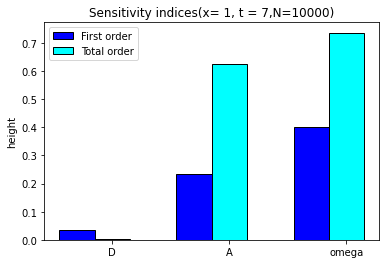

x=1, t=30
S_D=-0.002765495307994529
S_A=0.10599766358344928
S_w=0.4484633028752564
S_T_D=0.05285099207662047
S_T_A=0.5916552504473349
S_T_omega=0.8662563346896919


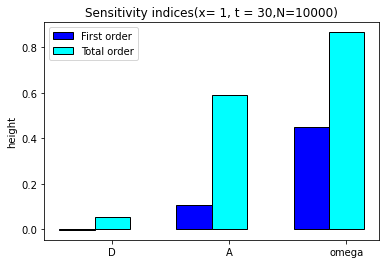

x=1, t=180
S_D=0.005853854328544216
S_A=0.01902114715528571
S_w=0.5596657383716198
S_T_D=0.017776761114141282
S_T_A=0.474965233141725
S_T_omega=0.9847704505980651


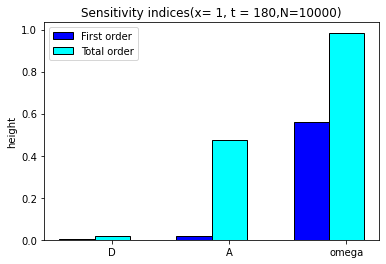

x=10, t=7
S_D=0.00908389839865469
S_A=0.0072040765940931326
S_w=0.37238458985585665
S_T_D=0.3304809682141534
S_T_A=0.7353610843160483
S_T_omega=0.9939531054234283


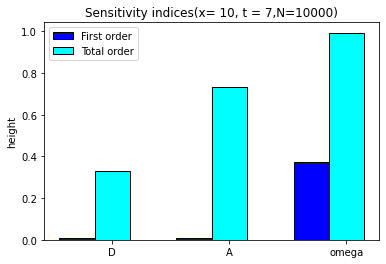

x=10, t=30
S_D=0.0027458113344611818
S_A=0.0006603590134378967
S_w=0.37823822262796447
S_T_D=0.3339895702348721
S_T_A=0.7383188792613927
S_T_omega=1.0022812642881072


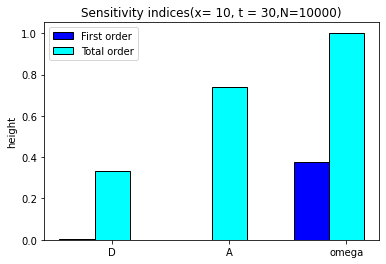

x=10, t=180
S_D=-0.001439909043875766
S_A=0.0029049378127210374
S_w=0.379152023669203
S_T_D=0.3408707366668211
S_T_A=0.735228692865089
S_T_omega=1.0025923873939087


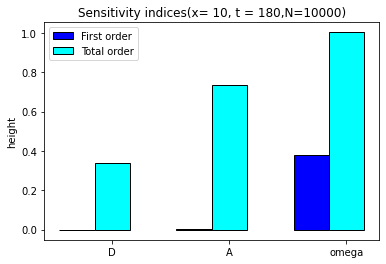

x=100, t=7
S_D=-0.0014319134875453575
S_A=8.970342682241711e-05
S_w=0.017029739001469032
S_T_D=0.9715494492108108
S_T_A=0.9985374607186482
S_T_omega=1.0000466541828965


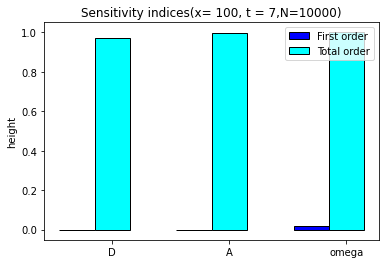

x=100, t=30
S_D=-0.03769824882269769
S_A=-0.0015103540004606116
S_w=0.016227244517290584
S_T_D=0.9725367370764078
S_T_A=0.998504078021355
S_T_omega=1.0001067003193518


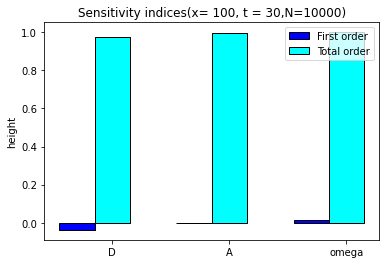

x=100, t=180
S_D=-0.0021780846286066596
S_A=-0.0007506269337490568
S_w=0.017749640464419944
S_T_D=0.9702230463670263
S_T_A=0.998377473544675
S_T_omega=1.0000515528471614


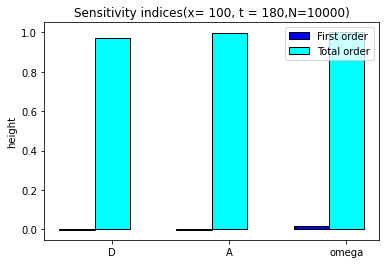

In [10]:
for x in [1, 10, 100]:
    xprint = x
    for t in [7, 30, 180]:
        tprint = t
        x = np.array(x)
        t = np.array(t)
        x = [x]
        t = [t]
        y_A = calculate_hxt(D, A, w, x, t)
        print(('x='+str(xprint)+', t='+str(tprint)+''))
        
        # Calculate y_B in the 3rd step of the Saltelli algorithm
        y_B = calculate_hxt(D_new, A_new, w_new, x, t)
        
        y_A == y_B # they have to be not equal to each other!!
        
        # Calculate (y_C)s in the 3rd step of the Saltelli algorithm

        y_C_1 = calculate_hxt(D, A_new, w_new, x, t)
        y_C_2 = calculate_hxt(D_new, A, w_new, x, t)
        y_C_3 = calculate_hxt(D_new, A_new, w,  x, t)
        
        # Mean approximation --> f_0^2   (Equation number (15.25) in the book)

        mean = (sum(y_A)/lm) * (sum(y_B)/lm)
        
        # First order indices (S_1 for D, S_2 for A, S_3 for omega, S_4 for phase)

        S_1 = ((sum([a*b for a,b in zip(y_A, y_C_1)]) / lm) - mean) / ((sum([number ** 2 for number in y_A]) / lm) - mean)
        print('S_D='+str(S_1))

        
        S_2 = ((sum([a*b for a,b in zip(y_A, y_C_2)]) / lm) - mean) / ((sum([number ** 2 for number in y_A]) / lm) - mean)
        print('S_A='+str(S_2))
        
        S_3 = ((sum([a*b for a,b in zip(y_A, y_C_3)]) / lm) - mean) / ((sum([number ** 2 for number in y_A]) / lm) - mean)
        print('S_w='+str(S_3))
        
        
        # Total effects indices (Equation number (15.26) in the book)

        S_T_1 = 1 - ((sum([a*b for a,b in zip(y_B, y_C_1)]) / lm) - mean) / ((sum([number ** 2 for number in y_A]) / lm) - mean)
        S_T_2 = 1 - ((sum([a*b for a,b in zip(y_B, y_C_2)]) / lm) - mean) / ((sum([number ** 2 for number in y_A]) / lm) - mean)
        S_T_3 = 1 - ((sum([a*b for a,b in zip(y_B, y_C_3)]) / lm) - mean) / ((sum([number ** 2 for number in y_A]) / lm) - mean)
        print('S_T_D='+str(S_T_1))
        print('S_T_A='+str(S_T_2))
        print('S_T_omega='+str(S_T_3))
        
        # Summation of the total effects indices
        S_T_1 + S_T_2 + S_T_3 

        # Summation of the first order indices
        S_1 + S_2 + S_3 
        
        # width of the bars
        barWidth = 0.3
 
        # Choose the height of the blue bars
        bars1 = [S_1, S_2, S_3]
 
        # Choose the height of the cyan bars
        bars2 = [S_T_1, S_T_2, S_T_3]
        # The x position of bars
        r1 = np.arange(len(bars1))
        r2 = [x + barWidth for x in r1]
 
        # Create blue bars
        plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='First order')
 
        # Create cyan bars
        plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='Total order')
        
        
            
        # general layout
        plt.xticks([r + barWidth for r in range(len(bars1))], ['D', 'A', 'omega'])
        plt.ylabel('height')
        plt.legend()
        #plt.title('Sensitivity indices('x= {}'.format(x)); t=180;N=10000)')
        plt.title('Sensitivity indices(x= '+str(xprint)+', t = '+str(tprint)+',N='+str(lm)+')')
        # Show graphic
        plt.show()

In [11]:
# Computation of joint sensitivity indices with the Salib-liabry

In [12]:
### **Defining Model Inputs**

#The first step is that we must define the model inputs.

In [13]:
b = 10 # saturated thicknes in meter
sy = 0.25 # specific yeld 

problem = {
    'num_vars': 3,
    'names': ['A', 'w', 'D'],
    'bounds': [[np.float_power(5, -1) , np.float_power(5, 1)],
               [(2*math.pi)/7, (2*math.pi)/2],
               [((8.64 * np.float_power(10, 0)) * b) / sy, ((8.64 * np.float_power(10, 2)) * b) / sy]],
    'dists': ['unif', 'unif', 'unif'] 
}

In [14]:
### **Generate Samples**

#Next, we generate the samples. Since we are performing a Sobol’ sensitivity analysis, we need to generate samples using the Saltelli sampler, as shown below.

In [15]:
param_values = saltelli.sample(problem, N = 10000, calc_second_order=True)

C:\Users\acker\anaconda3\lib\site-packages\SALib\sample\saltelli.py:52: FutureWarning: 
        Convergence properties of the Sobol' sequence is only valid if `N` = 2^n.
        SALib will continue on, but results may have issues.
        In future, this will raise an error.
        
  warnings.warn(msg, FutureWarning)


In [17]:
### **Run Model**

#We will loop over each sample input and evaluate the model:

In [18]:
def evaluate(values, x_input, t_input):
  Y = np.zeros([values.shape[0]])
    
  for i,X in enumerate(values):
          Y[i] = (X[0] * math.exp(-x_input * math.sqrt(X[1] / (2*X[2])))) * (math.sin(-x_input * math.sqrt((X[1] / (2*X[2])) + ((X[1] * t_input)))))   
  return Y

In [19]:
### **Perform Analysis**

#With the model outputs come from above, we can finally compute the sensitivity indices. In this part, we use sobol.analyze, which will compute first, second, and total-order indices.

#Si is a Python dict with the keys "S1", "S2", "ST", "S1_conf", "S2_conf", and "ST_conf". The _conf keys store the corresponding confidence intervals, typically with a confidence level of 95%. We will use the keyword argument *print_to_console=True* to print all indices.

Parameter S1 S1_conf ST ST_conf
A 0.155032 0.016114 0.342197 0.013134
w 0.657549 0.021775 0.844505 0.026324
D 0.000074 0.000235 0.000075 0.000009

Parameter_1 Parameter_2 S2 S2_conf
A w 0.186733 0.023816
A D -0.000155 0.023171
w D -0.000699 0.023388
[1.55031623e-01 6.57548681e-01 7.43600139e-05]


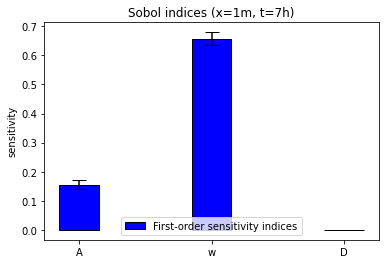

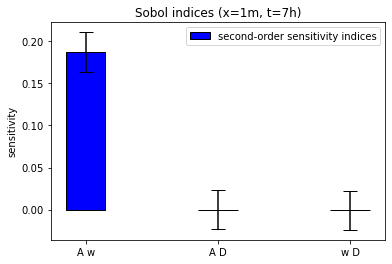

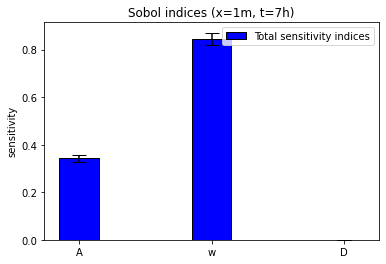

Parameter S1 S1_conf ST ST_conf
A 0.092797 0.018390 0.293241 0.010358
w 0.706937 0.029095 0.907846 0.026610
D 0.000025 0.000180 0.000049 0.000005

Parameter_1 Parameter_2 S2 S2_conf
A w 0.199997 0.025948
A D -0.000911 0.029153
w D -0.000444 0.028945
[9.27969642e-02 7.06937356e-01 2.54376621e-05]


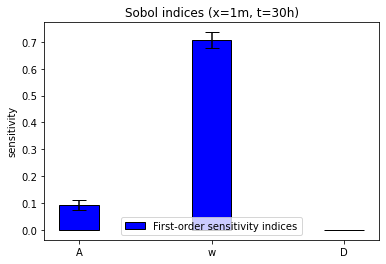

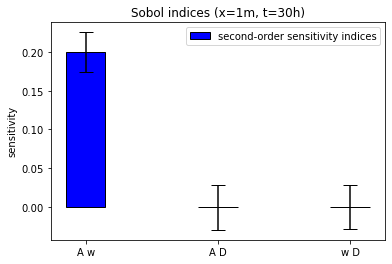

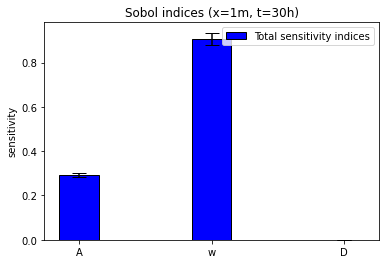

Parameter S1 S1_conf ST ST_conf
A -0.002460 0.013907 0.221738 0.007259
w 0.779290 0.023873 0.998797 0.027515
D 0.000067 0.000163 0.000040 0.000003

Parameter_1 Parameter_2 S2 S2_conf
A w 0.223795 0.020820
A D 0.004402 0.024245
w D -0.000774 0.020098
[-2.45989404e-03  7.79289775e-01  6.70406418e-05]


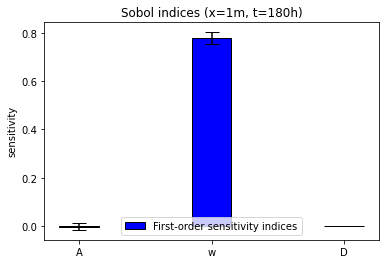

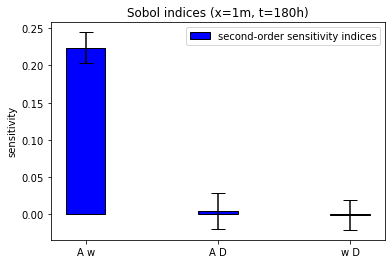

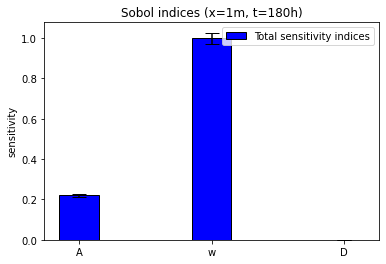

Parameter S1 S1_conf ST ST_conf
A 0.002095 0.015090 0.224310 0.008133
w 0.771865 0.022741 0.996777 0.030286
D -0.000157 0.001538 0.003298 0.000297

Parameter_1 Parameter_2 S2 S2_conf
A w 0.222669 0.022514
A D 0.001355 0.025936
w D 0.004397 0.021006
[ 2.09523239e-03  7.71865276e-01 -1.57394354e-04]


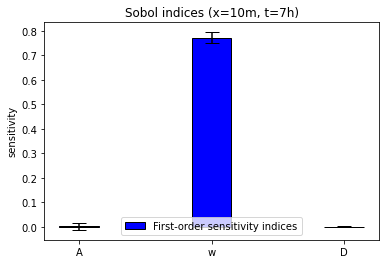

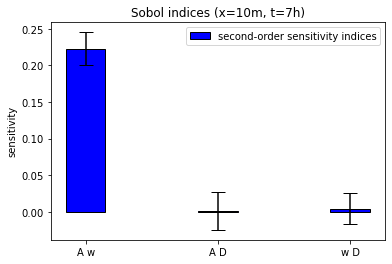

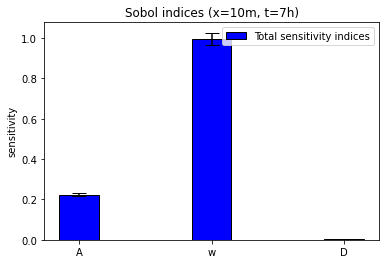

Parameter S1 S1_conf ST ST_conf
A 0.005003 0.013713 0.221533 0.006870
w 0.784195 0.020923 1.011852 0.028396
D -0.000309 0.001511 0.003214 0.000253

Parameter_1 Parameter_2 S2 S2_conf
A w 0.217580 0.019951
A D -0.005571 0.024676
w D 0.003442 0.018352
[ 5.00310211e-03  7.84195158e-01 -3.08989368e-04]


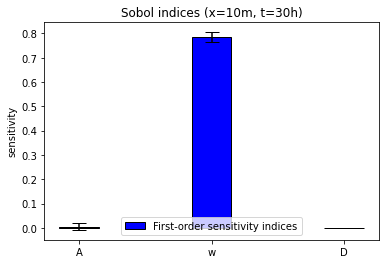

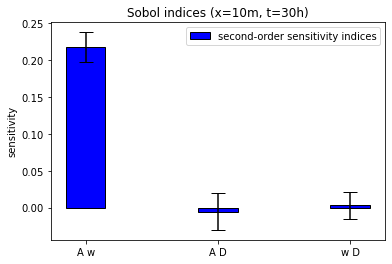

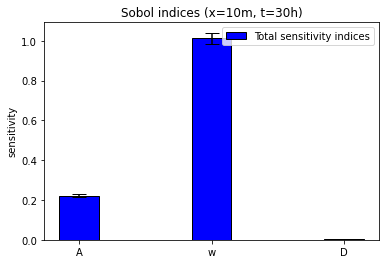

Parameter S1 S1_conf ST ST_conf
A -0.004382 0.013347 0.221542 0.006756
w 0.786634 0.024377 1.006345 0.032984
D 0.001109 0.001409 0.003271 0.000265

Parameter_1 Parameter_2 S2 S2_conf
A w 0.224560 0.020838
A D 0.009136 0.023724
w D 0.002145 0.018203
[-0.00438212  0.78663359  0.00110938]


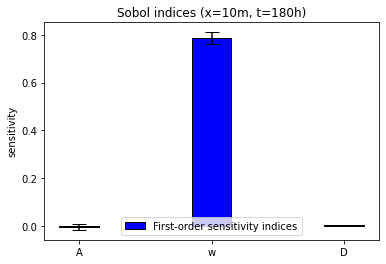

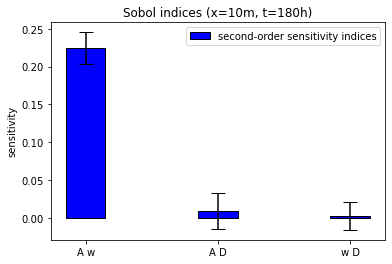

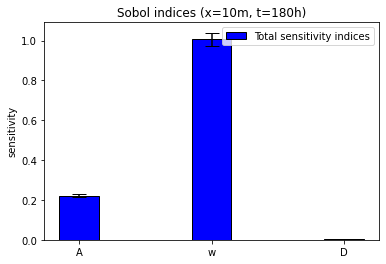

Parameter S1 S1_conf ST ST_conf
A -0.003945 0.012676 0.218481 0.007962
w 0.698729 0.023791 0.990140 0.036321
D -0.006213 0.007274 0.095078 0.004666

Parameter_1 Parameter_2 S2 S2_conf
A w 0.203848 0.021078
A D 0.000539 0.024902
w D 0.085617 0.024355
[-0.00394482  0.69872873 -0.00621346]


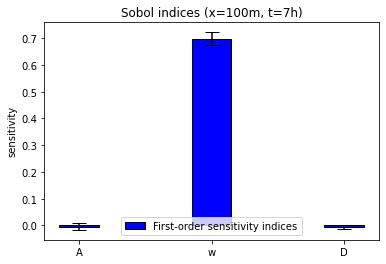

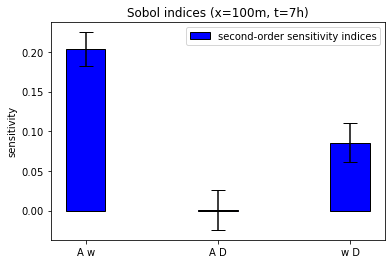

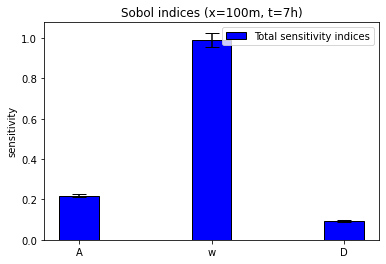

Parameter S1 S1_conf ST ST_conf
A 0.006000 0.015118 0.220034 0.008080
w 0.692437 0.022132 0.986642 0.031813
D 0.006220 0.007249 0.098278 0.004606

Parameter_1 Parameter_2 S2 S2_conf
A w 0.191416 0.022180
A D -0.006921 0.026418
w D 0.063423 0.024703
[0.00599991 0.69243709 0.00622039]


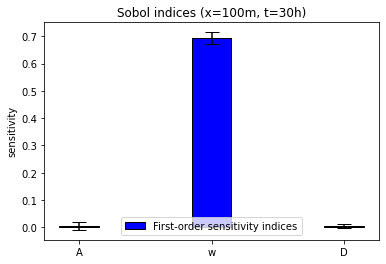

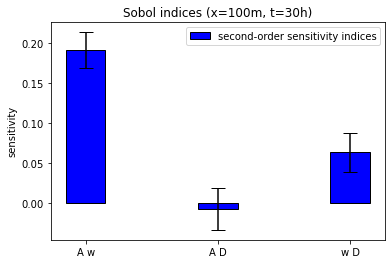

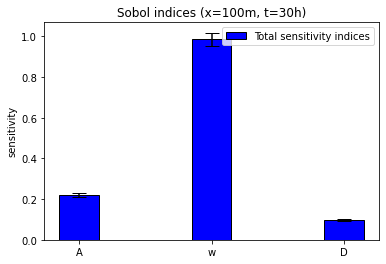

Parameter S1 S1_conf ST ST_conf
A 0.011117 0.014552 0.219711 0.008060
w 0.690422 0.024545 0.989585 0.034575
D -0.004338 0.007481 0.098139 0.005959

Parameter_1 Parameter_2 S2 S2_conf
A w 0.185718 0.021805
A D -0.019636 0.024845
w D 0.082604 0.022952
[ 0.01111651  0.69042234 -0.00433804]


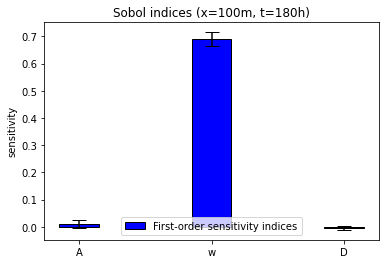

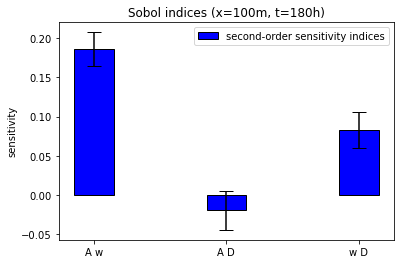

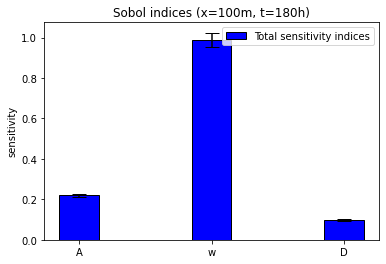

In [20]:
for x in [1, 10, 100]:
    for t in [7, 30, 180]:
        
        Y = evaluate(param_values, x_input = np.array([x]), t_input = np.array([t]))

        Si = sobol.analyze(problem, Y, print_to_console=True)

        # Print the first-order, second-order and total sensitivity indices
        print(Si['S1'])
        
        # width of the bars
        barWidth = 0.3
 
        # Choose the height of the blue bars
        bars1 = [Si['S1'][0], Si['S1'][1], Si['S1'][2]]
        yer1 = [Si['S1_conf'][0], Si['S1_conf'][1], Si['S1_conf'][2]]
 

        # The x position of bars
        r1 = np.arange(len(bars1))
 
        # Create blue bars
        plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='First-order sensitivity indices')
 

 
        # general layout
        plt.xticks([r  for r in range(len(bars1))], ['A', 'w', 'D'])
        plt.ylabel('sensitivity')
        plt.legend()
        plt.title('Sobol indices (x='+str(x)+'m, t='+str(t)+'h)')
        # Show graphic
        plt.show()




        # width of the bars
        barWidth = 0.3
 
        # Choose the height of the blue bars
        bars1 = [Si['S2'][0,1], Si['S2'][0,2], Si['S2'][1,2]]
        yer1 = [Si['S2_conf'][0,1], Si['S2_conf'][0,2], Si['S2_conf'][1,2]]
     

        # The x position of bars
        r1 = np.arange(len(bars1))
 
        # Create blue bars
        plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='second-order sensitivity indices')
 

 
        # general layout
        plt.xticks([r  for r in range(len(bars1))], ['A w', 'A D', 'w D'])
        plt.ylabel('sensitivity')
        plt.legend()
        plt.title('Sobol indices (x='+str(x)+'m, t='+str(t)+'h)')
        # Show graphic
        plt.show()
        
        #total sensitivity indices
         
            
        # width of the bars
        barWidth = 0.3
 
        # Choose the height of the blue bars
        bars1 = [Si['ST'][0], Si['ST'][1], Si['ST'][2]]
        yer1 = [Si['ST_conf'][0], Si['ST_conf'][1], Si['ST_conf'][2]]
 

        # The x position of bars
        r1 = np.arange(len(bars1))
 
        # Create blue bars
        plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='Total sensitivity indices')
 

 
        # general layout
        plt.xticks([r  for r in range(len(bars1))], ['A', 'w', 'D'])
        plt.ylabel('sensitivity')
        plt.legend()
        plt.title('Sobol indices (x='+str(x)+'m, t='+str(t)+'h)')
        # Show graphic
        plt.show()